In [588]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_classification

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [589]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [590]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
    
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #Formula used to get w is w = (X_transpose*X)^-1*X_transpose*y
    #where (X_transpose*X) is mat_mul_result and inverse_result is the inverse of mat_mul_result
    
    #X_transpose = the transpose of X
    X_transpose = X.transpose()
    
    #mat_mul_result = the matrix multiplication between X and X_transpose
    mat_mul_result = np.matmul(X_transpose,X)
    
    #inverse_result = the inverse of mat_mul_result
    inverse_result = np.linalg.inv(mat_mul_result)
    
    #end_result = the matrix multiplication of the inverse result and the transpose of X
    end_result = np.matmul(inverse_result,X_transpose);
    #w is the vector containing the weights
    
    w = np.matmul(end_result,y);
    return w

In [591]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #print("type of Xtest" + str(type(Xtest)))
#     xi = Xtest[0]
#     print(xi)
#     print(len(xi))

    #transpose of w
    w_transpose = w.transpose()
    
    #number of of x's
    N = Xtest.shape[0]
    
    #total of summation
    total = 0
    
    for i in range(N):
        #xi is the ith row in Xtest
        xi = Xtest[i]
        
        #yi is the target value for xi
        yi = ytest[i]
        
        #computes the dot product of W_transpose and xi
        result_xi_wt =np.matmul(w_transpose,xi)
        
        #computes the subtraction of yi with result_xi_wt (w^t*xi)
        result_yi_wtxi = yi - result_xi_wt
        
        #squares the inside for the summation square loss formula
        result_summation = result_yi_wtxi**2
        total = total + result_summation 
        
    #the radican of the RMSE formula    
    radicand = total/N    
    rmse = radicand**.5
    return rmse

In [592]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [593]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [594]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value
    
    #number of rows in X and y
    N = X.shape[0]
  
    #product of X * w result is (N x 1)
    X_w_product = np.matmul(X,w)
    
    #reshaping from 1D to 2D array
    X_w_product = X_w_product.reshape(N,1)
    
    #result from y-Xw(X_w_product)
    subtract_y_Xw = np.subtract(y , X_w_product)
    
    #subtract_y_Xw_transpose is basically (y-Xw)^t
    subtract_y_Xw_transpose = subtract_y_Xw.transpose()
    
    result = np.matmul(subtract_y_Xw_transpose,subtract_y_Xw)   

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    error = result/2;
    return error


In [595]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)
    
    #number of attributes in X
    d = X.shape[1]
    
    #transpose of x
    X_transpose = X.transpose()
    
    #product of X^t * X 
    X_transpose_X = np.matmul(X_transpose,X)
    
    #result of (X^t * X * w) leads to a (d x 1)
    first_term_result = np.matmul(X_transpose_X,w)
    
    #reshaping to a 2d array
    first_term_result = first_term_result.reshape(d,1)
    
    #result of (X^t * y) results to a (d x 1)
    second_term_result = np.matmul(X_transpose,y)
    
    #gradient of J(w) = (X^t * X * w) - (X^t * y)
    gradient = np.subtract(first_term_result,second_term_result)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 
    
    #d length vector
    error_grad = gradient.reshape(d,)
    return error_grad

In [596]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

Gradient Descent Linear Regression RMSE on train data - 48.08
Gradient Descent Linear Regression RMSE on test data - 54.80


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [597]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [598]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions
    ypred = np.zeros([Xtest.shape[0],1])
    
    #number of attributes in xi
    d = w.shape[0]
    
    #number of inputs X
    N = Xtest.shape[0]
    
    #inserted all 1's into Xtest column 0
    #Xtest = np.insert(Xtest, 0, 1, axis =1)
    
    #transpose of w (1 x d)
    w_transpose = w.transpose()
    
    #empty list of y predictions
    #ypred = np.zeros([Xtest.shape[0],1])
    
    for i in range(N):
        
        #extract rows from Xtest
        xi = Xtest[i]
        
        #dot product of xi and w
        w_transpose_Xi = np.matmul(xi,w)
        
        if(w_transpose_Xi <= 0):
            ypred[i] = -1
        else:
            ypred[i] = 1
        

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #ypred = np.zeros([Xtest.shape[0],1])
    return ypred

In [599]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values
    ypred = predictLinearModel(w,Xtest)
    
    N = ytest.shape[0]
    acc = 0
    
    for i in range(N):
        if(ypred[i] == ytest[i]):
            acc = acc +1
                
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    return acc

In [600]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

print("\n")
print("minimize:")
soln = minimize(evaluateLinearModel, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

Perceptron Accuracy on train data - 84.00
Perceptron Accuracy on test data - 84.00


minimize:
Perceptron Accuracy on train data - 46.00
Perceptron Accuracy on test data - 55.00


### Problem 4 - Logistic Regression Using Newton's Method

In [601]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [602]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    # 1 x d  storage for row element of Xi
    transposeW = np.transpose(w) 
    tempVal = 0
    tempY = 0
    tempResult = 0
    i = 0
    while i < y.size:
        # extract ith row from Xi and store it in termp storage 
        extractedData = X[i]
        tempRet = np.dot(transposeW,extractedData)
        tempVal = (1/(1+np.exp((-1)*(tempRet))))
#         tempY = (-1,1)[tempVal<0.5] 
        if tempVal < 0.5:
            tempY = -1
        elif tempVal >= 0.5:
            tempY = 1
        tempResult += np.log(1+np.exp(tempY*tempRet))
        i+=1
    retVal = tempResult/y.size
#     print(retVal)
    return retVal
      
#     error = 0
#     return error

In [603]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

#     if len(w.shape) == 1: #if the tuple has 1 element i.e. is 1-d => (3,)
#         w = w[:,np.newaxis]#converts the previously 1d array w into a column vector
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
#     gradient = np.zeros((w.shape[0],))
    gradient =0
    for i in range(len(X)):
        ywTx = y[i]*(np.dot(w,X[i]))
        #         print(ywTx)
        e = np.exp(ywTx)
        tmp = y[i]/(1+e)
        #         print(tmp*X[i])
        gradient += tmp*X[i]
        
#     gradient.reshape(1,3) 
#     print("yeet")
#     print(gradient)
    gradient /=0-len(X)
    return gradient

In [604]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
    N = X.shape[0]
    w_transpose = w.transpose()
    retVal =0
    for i in range(N):
        xi = X[i].reshape(1,3)
        yi = y[i]
        w = w.reshape(3,1)
        exponent = yi * np.matmul(w,xi)
        numerator = np.exp(exponent)
        denominator = (1 + numerator)**2
        
        x_transpose_x = np.matmul(xi,xi.transpose())
        
        result = (numerator/denominator)*x_transpose_x
        retVal = retVal + result
    print(retVal/N)
    return retVal/N
#    return hessian

In [605]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

print("\n")
print("minimize:")
soln = minimize(evaluateLinearModel, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

[[2.62742254 2.62742254 2.62742254]
 [2.62742254 2.62742254 2.62742254]
 [2.62742254 2.62742254 2.62742254]]
Logistic Regression Accuracy on train data - 46.00
Logistic Regression Accuracy on test data - 55.00


minimize:
[[2.62742254 2.62742254 2.62742254]
 [2.62742254 2.62742254 2.62742254]
 [2.62742254 2.62742254 2.62742254]]
Logistic Regression Accuracy on train data - 46.00
Logistic Regression Accuracy on test data - 55.00


### Problem 5 - Support Vector Machines Using Gradient Descent

In [606]:
print('PROBLEM 5')
print('----------')

PROBLEM 5
----------


In [607]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta(η) = learning rate
    # Output:
    # weight vector, w = d x 1

    # IMPLEMENT THIS METHOD
    w = np.zeros([X.shape[1],1])#initialize a weight vector with a bunch of zeros
    for t in range(0, T):   
        i = np.random.randint(low=0, high =len(X))#random X matrix column index
        XRandomRow = X[i]#accesses a random column in X
        randomY = y[i]

        tmp = randomY*(np.dot(XRandomRow,w))#tmp ends up an ARRAY with 1 element
        if(randomY*tmp[0]< 1): 
            mhmm = randomY*XRandomRow
            w += (eta*mhmm.reshape(3,1))#call reshape since randomY*XRandomRow is a 1d array while w is a 2d array
    print(w)        
    return w

In [608]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,100,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

print("\n")
print("Iteration 200:")
args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,100,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

[[-0.03      ]
 [-0.04132456]
 [-0.88950691]]
SVM Accuracy on train data - 67.00
SVM Accuracy on test data - 81.00


Iteration 200:
[[ 0.14      ]
 [ 0.44175187]
 [-0.47558287]]
SVM Accuracy on train data - 76.00
SVM Accuracy on test data - 66.00


### Problem 6 - Plotting decision boundaries

In [609]:
print('Problem 6')
print('---------')

Problem 6
---------


In [610]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

[[2.62742254 2.62742254 2.62742254]
 [2.62742254 2.62742254 2.62742254]
 [2.62742254 2.62742254 2.62742254]]
[[-0.1       ]
 [-0.03172897]
 [-1.65835706]]


Text(0.5, 1.0, 'SVM')

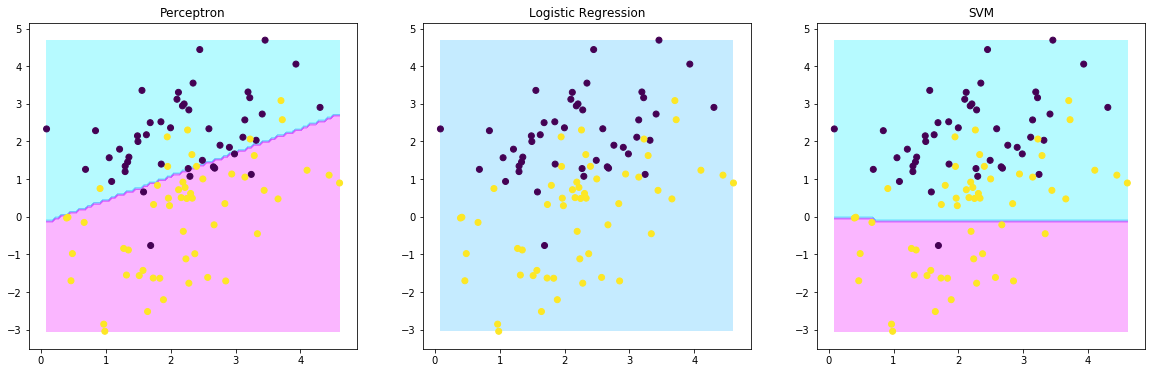

In [612]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
w_perceptron = learnOLERegression(Xtrain_i,ytrain)
w_logistic = w
w_svm = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
